In [1]:
#pip install zip-files

Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import zipfile


folder_path = 'C:/ComputerScience/Journal' # specify the folder path here
destination_folder = 'C:/ComputerScience/Journal/data' # specify the destination folder here

for file_name in os.listdir(folder_path):
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(folder_path, file_name), 'r') as zip_ref:
            for member in zip_ref.namelist():
                if member.endswith('.csv'):
                    destination_path = os.path.join(destination_folder, f"{os.path.splitext(os.path.basename(member))[0]}_{os.path.splitext(file_name)[0]}.csv")
                

In [14]:
import os
import zipfile
# Define the source and destination folders
source_folder = "C:/ComputerScience/Journal"
destination_folder = "data"

# Loop through all the files in the source folder
for file in os.listdir(source_folder):
    # Check if the file is a zip file
    if file.endswith(".zip"):
        # Open the zip file
        with zipfile.ZipFile(os.path.join(source_folder, file), "r") as zip_file:
            # Loop through all the files in the zip file
            for zip_file_name in zip_file.namelist():
                # Check if the file is a csv file
                if zip_file_name.endswith(".csv"):
                    # Extract the csv file to the destination folder
                    zip_file.extract(zip_file_name, destination_folder)
                    # Convert the zip file name to lower case
                    file = file.lower()
                    # Rename the csv file by concatenating the zip file name (without extension)
                    new_csv_file_name = zip_file_name[:-4] + "_" + file[:-4] + ".csv"
                    os.rename(os.path.join(destination_folder, zip_file_name), os.path.join(destination_folder, new_csv_file_name))

In [3]:
import os
import zipfile
import pandas as pd
# Define the source and destination folders
destination_folder = "data"

#loop through all csv files in the folder
for file in os.listdir(destination_folder):
    if file.endswith(".csv"):
        # Read the csv file
        df = pd.read_csv(os.path.join(destination_folder, file))
        # Add a new column to the dataframe
        df["file_name"] = file
        # Write the dataframe to a csv file
        df.to_csv(os.path.join(destination_folder, file), index=False)
#list all the csv files and their columns
for file in os.listdir(destination_folder):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(destination_folder, file))
        print(file)
        print(df.columns)
        print()

dly1116_wexford-cahore.csv
Index(['date', 'ind', 'rain', 'ind.1', 'maxt', 'ind.2', 'mint', 'gmin', 'soil',
       'file_name'],
      dtype='object')

dly1275_sligo-markree.csv
Index(['date', 'ind', 'maxtp', 'ind.1', 'mintp', 'igmin', 'gmin', 'ind.2',
       'rain', 'cbl', 'soil', 'file_name'],
      dtype='object')

dly1407_waterford-dungarvan.csv
Index(['date', 'ind', 'rain', 'ind.1', 'maxt', 'ind.2', 'mint', 'gmin', 'soil',
       'file_name'],
      dtype='object')

dly1875_galway-athenry.csv
Index(['date', 'ind', 'maxtp', 'ind.1', 'mintp', 'igmin', 'gmin', 'ind.2',
       'rain', 'cbl', 'wdsp', 'ind.3', 'hm', 'ind.4', 'ddhm', 'ind.5', 'hg',
       'soil', 'pe', 'evap', 'smd_wd', 'smd_md', 'smd_pd', 'glorad',
       'file_name'],
      dtype='object')

dly2038_monaghan-carrickmacross (dunoge).csv
Index(['date', 'ind', 'rain', 'ind.1', 'maxt', 'ind.2', 'mint', 'gmin', 'soil',
       'file_name'],
      dtype='object')

dly2075_donnegal-finner.csv
Index(['date', 'ind', 'maxtp', 'ind.

# The lines before the header were manually removed

In [31]:
import pandas as pd

# Read weather data from csv file
county_galway = pd.read_csv("data/dly1875_galway-athenry.csv")

In [32]:
county_galway["date"] = pd.to_datetime(county_galway["date"])

# Drop the rows where date is lesser than 2018 or greater than 2022
county_galway = county_galway[(county_galway["date"].dt.year >= 2018) & (county_galway["date"].dt.year <= 2022)]

# Save the filtered data to a new csv file
county_galway.to_csv("data/county_galway.csv", index=True)

In [33]:
print(county_galway.dtypes)

date         datetime64[ns]
ind                   int64
maxtp               float64
ind.1                 int64
mintp               float64
igmin                object
gmin                 object
ind.2                 int64
rain                 object
cbl                  object
wdsp                 object
ind.3                 int64
hm                    int64
ind.4                 int64
ddhm                 object
ind.5                 int64
hg                    int64
soil                 object
pe                   object
evap                 object
smd_wd               object
smd_md               object
smd_pd               object
glorad               object
file_name            object
dtype: object


In [ ]:
county_galway[["soil","pe","evap","smd_wd", "smd_md", "smd_pd"]] = county_galway[["soil","pe","evap","smd_wd","smd_md","smd_pd"]].astype(float)

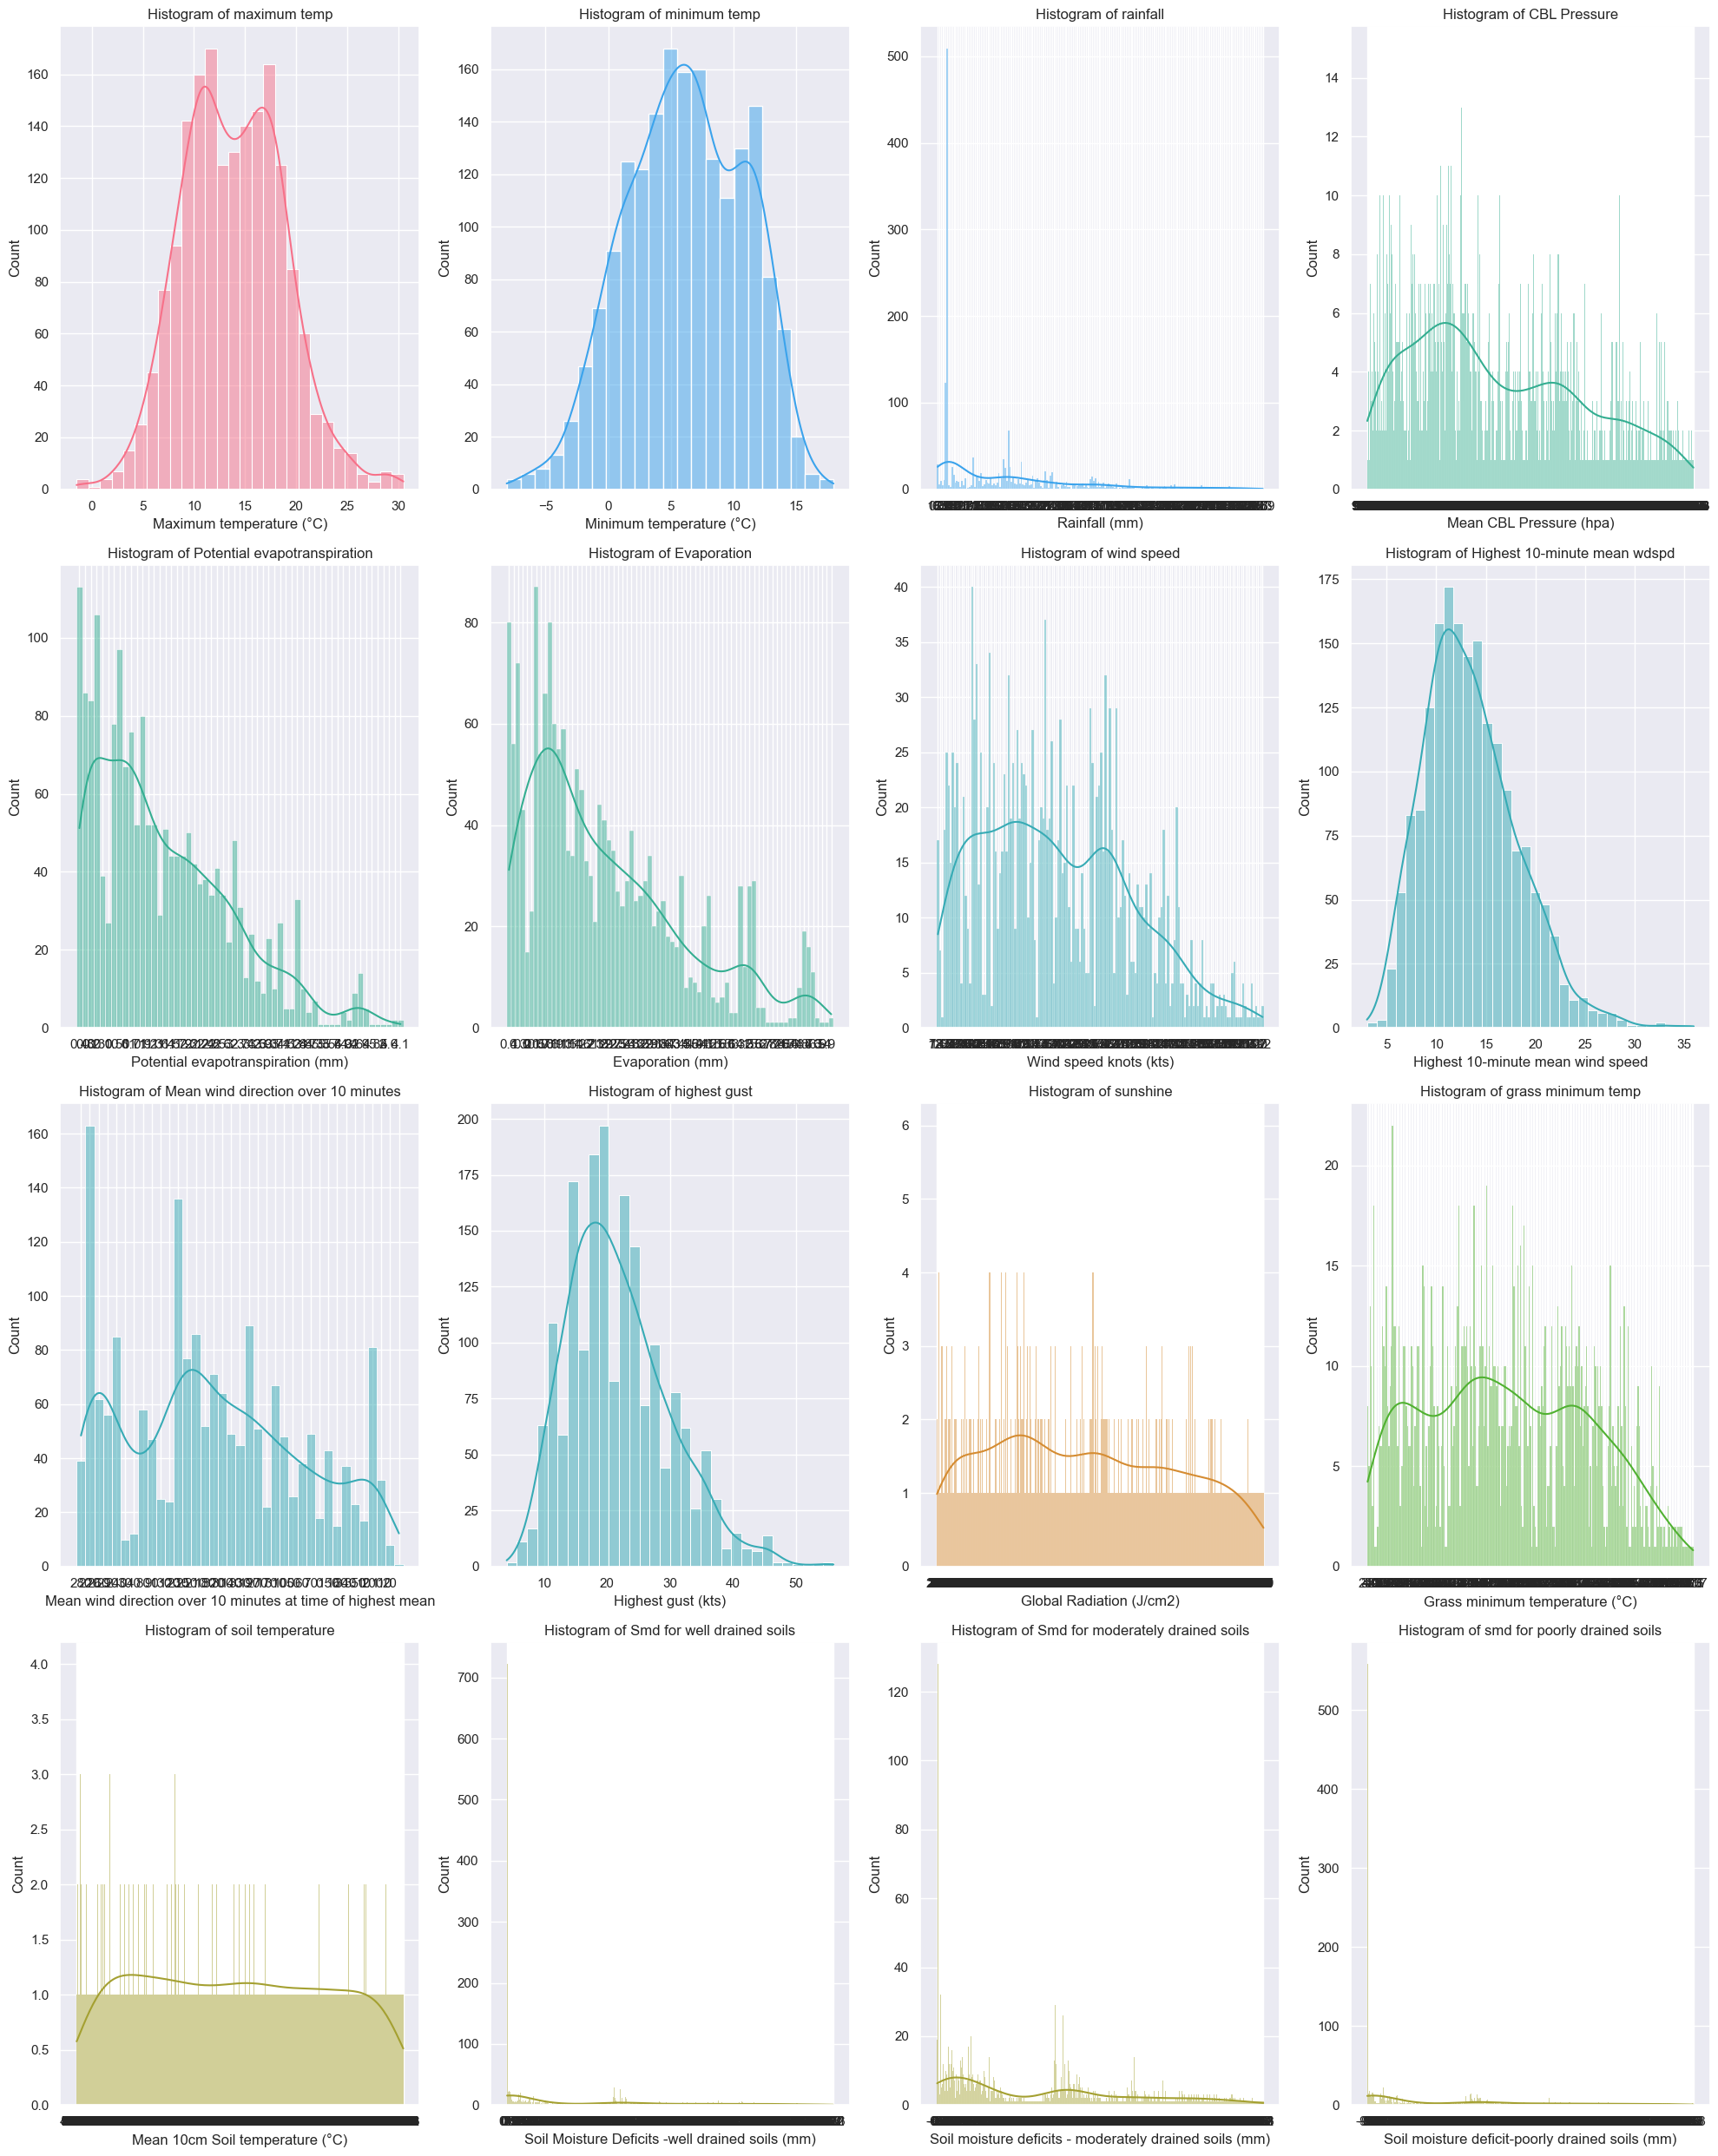

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# Increase the number of subplots to 4x5
# Increase the number of subplots to 4x5
fig, axs = plt.subplots(4, 4, figsize=(20, 25))

# Use different variables for each plot
# Use a palette to create a consistent color scheme
palette = sns.color_palette("husl", 9)
sns.histplot(data=county_galway, x="maxtp", ax=axs[0, 0], kde=True, color=palette[0])
sns.histplot(data=county_galway, x="mintp", ax=axs[0, 1], kde=True, color=palette[6])

sns.histplot(data=county_galway, x="rain", ax=axs[0, 2], kde=True, color=palette[6])
sns.histplot(data=county_galway, x="cbl", ax=axs[0, 3], kde=True,color=palette[4])

sns.histplot(data=county_galway,x="pe",ax=axs[1,0],kde=True,color=palette[4])
sns.histplot(data=county_galway,x="evap",ax=axs[1 ,1],kde=True,color=palette[4])

sns.histplot(data=county_galway,x="wdsp",ax=axs[1 ,2],kde=True,color=palette[5])
sns.histplot(data=county_galway,x="hm",ax=axs[1 ,3],kde=True,color=palette[5])
sns.histplot(data=county_galway,x="ddhm",ax=axs[2 ,0],kde=True,color=palette[5])
sns.histplot(data=county_galway,x="hg",ax=axs[2 ,1],kde=True,color=palette[5])
sns.histplot(data=county_galway,x="glorad",ax=axs[2 ,2],kde=True,color=palette[1])

sns.histplot(data=county_galway, x="gmin", ax=axs[2, 3], kde=True, color=palette[3])
# sns.histplot(data=county_galway,x="dos",ax=axs[2 ,2],kde=True,color=palette[5])
sns.histplot(data=county_galway,x="soil",ax=axs[3 ,0],kde=True,color=palette[2])
sns.histplot(data=county_galway,x="smd_wd",ax=axs[3 ,1],kde=True,color=palette[2])
sns.histplot(data=county_galway,x="smd_md",ax=axs[3 ,2],kde=True,color=palette[2])
sns.histplot(data=county_galway,x="smd_pd",ax=axs[3 ,3],kde=True,color=palette[2])


# Add labels and titles for each plot
axs[0 ,0].set_xlabel("Maximum temperature (°C)")
axs[0 ,0].set_ylabel("Count")
axs[0 ,0].set_title("Histogram of maximum temp")

axs[0 ,1].set_xlabel("Minimum temperature (°C)")
axs[0 ,1].set_ylabel("Count")
axs[0 ,1].set_title("Histogram of minimum temp")

axs[0 ,2].set_xlabel("Rainfall (mm)")
axs[0 ,2].set_ylabel("Count")
axs[0 ,2].set_title("Histogram of rainfall")

axs[0 ,3].set_xlabel("Mean CBL Pressure (hpa)")
axs[0 ,3].set_ylabel("Count")
axs[0 ,3].set_title("Histogram of CBL Pressure")


axs[1 ,0].set_xlabel("Potential evapotranspiration (mm)")
axs[1 ,0].set_ylabel("Count")
axs[1 ,0].set_title("Histogram of Potential evapotranspiration")

axs[1 ,1].set_xlabel("Evaporation (mm)")
axs[1 ,1].set_ylabel("Count")
axs[1 ,1].set_title("Histogram of Evaporation")

# Repeat for other plots ...
axs[1 ,2].set_xlabel("Wind speed knots (kts)")
axs[1 ,2].set_ylabel("Count")
axs[1 ,2].set_title("Histogram of wind speed")
axs[1 ,3].set_xlabel("Highest 10-minute mean wind speed")
axs[1 ,3].set_ylabel("Count")
axs[1 ,3].set_title("Histogram of Highest 10-minute mean wdspd")
axs[2 ,0].set_xlabel("Mean wind direction over 10 minutes at time of highest mean")
axs[2 ,0].set_ylabel("Count")
axs[2 , 0].set_title("Histogram of Mean wind direction over 10 minutes")
axs[2 ,1].set_xlabel("Highest gust (kts)")
axs[2 ,1].set_ylabel("Count")
axs[2 ,1].set_title("Histogram of highest gust")
axs[2,2].set_xlabel("Global Radiation (J/cm2)")
axs[2,2].set_ylabel("Count")
axs[2,2].set_title("Histogram of sunshine")

axs[2,3].set_xlabel("Grass minimum temperature (°C)")
axs[2,3].set_ylabel("Count")
axs[2,3].set_title("Histogram of grass minimum temp")

axs[3 ,0].set_xlabel("Mean 10cm Soil temperature (°C)")
axs[3 ,0].set_ylabel("Count")
axs[3 ,0].set_title("Histogram of soil temperature")
axs[3 ,1].set_xlabel("Soil Moisture Deficits -well drained soils (mm)")
axs[3 ,1].set_ylabel("Count")
axs[3 ,1].set_title("Histogram of Smd for well drained soils")
axs[3 ,2].set_xlabel("Soil moisture deficits - moderately drained soils (mm)")
axs[3 ,2].set_ylabel("Count")
axs[3 ,2].set_title("Histogram of Smd for moderately drained soils")
axs[3 ,3].set_xlabel("Soil moisture deficit-poorly drained soils (mm)")
axs[3 ,3].set_ylabel("Count")
axs[3 ,3].set_title("Histogram of smd for poorly drained soils")

# fig.delaxes(axs[3, 1])
# fig.delaxes(axs[3, 2])
# fig.delaxes(axs[3, 3])
# fig.delaxes(axs[3, 4])


# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
county_galway= county_galway.replace(r'\s+', 999, regex=True)


New Code with pickle

In [21]:
import pandas as pd
import pickle

# Load the data
try:
    with open("data/county_galway.pkl", "rb") as f:
        county_galway = pickle.load(f)
except FileNotFoundError:
    county_galway = pd.read_csv("data/dly1875_galway-athenry.csv")
    county_galway["date"] = pd.to_datetime(county_galway["date"])
    county_galway = county_galway[(county_galway["date"].dt.year >= 2018) & (county_galway["date"].dt.year <= 2022)]


In [40]:
county_galway = county_galway[~county_galway['date'].isin(['2021-07-20', '2021-09-11'])]

In [53]:
print(county_galway.dtypes)

date         datetime64[ns]
maxtp               float64
mintp               float64
igmin                object
gmin                float64
rain                float64
cbl                 float64
wdsp                float64
hm                    int64
ddhm                  int64
hg                    int64
soil                float64
pe                  float64
evap                float64
smd_wd              float64
smd_md              float64
smd_pd              float64
glorad                int64
file_name            object
dtype: object


In [55]:
county_galway = county_galway.loc[:, ~county_galway.columns.str.startswith(('ind', 'file'))]

In [23]:
# Assuming df is the name of your dataframe
county_galway= county_galway.replace(r'\s+', 999, regex=True)


In [25]:
# Replace blanks with mean value in "glorad" column
county_galway["glorad"].replace(999, county_galway["glorad"].median(), inplace=True)

# Replace blanks with mean value in "hm" column
county_galway["hm"].replace(999, county_galway["hm"].mean(), inplace=True)

# Replace blanks with mean value in "ddhm" column
county_galway["ddhm"].replace(999, county_galway["ddhm"].median(), inplace=True)


In [57]:
county_galway[["glorad","hm","ddhm"]] = county_galway[["glorad","hm","ddhm"]].astype("int64")

In [58]:
# Convert multiple columns to float data type
columns_to_convert = ["gmin", "rain", "cbl", "wdsp", "soil", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
county_galway[columns_to_convert] = county_galway[columns_to_convert].astype(float)


In [59]:
print(county_galway.dtypes)

date      datetime64[ns]
maxtp            float64
mintp            float64
igmin             object
gmin             float64
rain             float64
cbl              float64
wdsp             float64
hm                 int64
ddhm               int64
hg                 int64
soil             float64
pe               float64
evap             float64
smd_wd           float64
smd_md           float64
smd_pd           float64
glorad             int64
dtype: object


In [5]:
county_galway['rainfall_class'] = county_galway['rain'] != 0

In [6]:
with open("data/county_galway.pkl", "wb") as f:
        pickle.dump(county_galway, f)

Starting point from loading Pkl file

In [1]:
import pandas as pd
import pickle

with open("data/county_galway.pkl", "rb") as f:
    county_galway = pickle.load(f)


In [2]:
county_galway.dtypes

date              datetime64[ns]
maxtp                    float64
mintp                    float64
igmin                     object
gmin                     float64
rain                     float64
cbl                      float64
wdsp                     float64
hm                         int64
ddhm                       int64
hg                         int64
soil                     float64
pe                       float64
evap                     float64
smd_wd                   float64
smd_md                   float64
smd_pd                   float64
glorad                     int64
rainfall_class              bool
dtype: object

In [61]:
county_galway.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
maxtp,1824.0,13.852796,4.959920,-1.500,10.2750,13.700,17.400,30.500
mintp,1824.0,6.159430,4.680196,-8.100,2.8000,6.200,9.925,18.000
gmin,1824.0,4.407401,5.688008,-11.800,0.2000,4.400,8.900,17.200
rain,1824.0,3.448739,5.207611,0.000,0.0000,1.000,5.000,40.600
cbl,1824.0,1008.023410,12.345820,967.200,1000.0750,1009.300,1016.700,1040.900
wdsp,1824.0,7.088761,2.979646,1.200,4.9000,6.600,8.800,20.500
hm,1824.0,13.451206,4.747587,3.000,10.0000,13.000,16.000,36.000
ddhm,1824.0,204.550439,85.241844,0.000,140.0000,220.000,260.000,350.000
hg,1824.0,21.736294,8.070865,4.000,16.0000,21.000,26.000,56.000
soil,1824.0,11.355383,5.205340,-0.516,6.8965,11.199,15.828,24.855


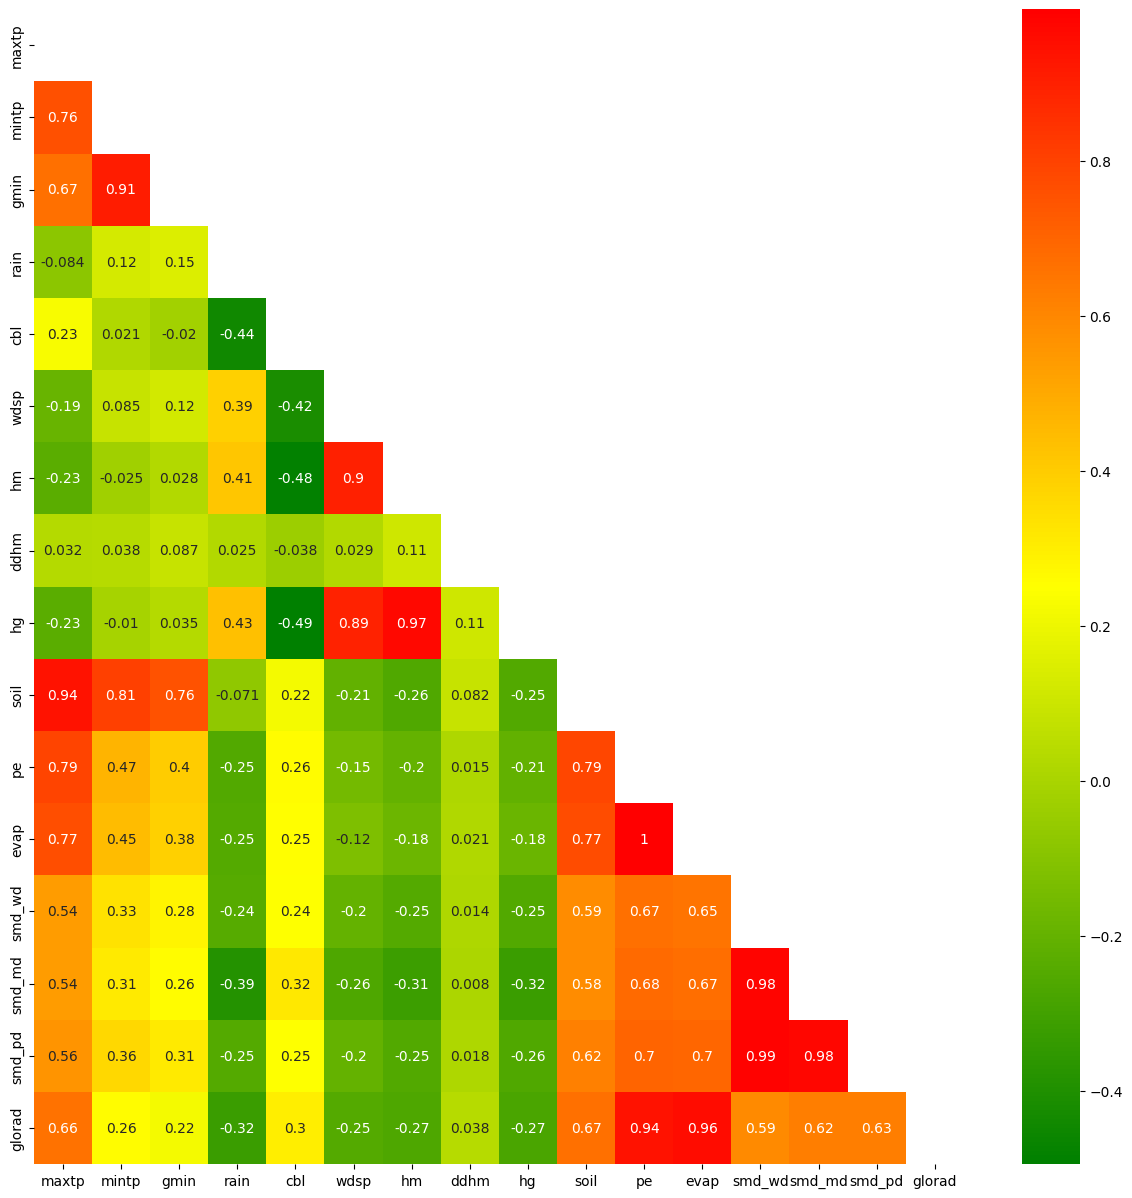

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['green', 'yellow', 'red']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('green_yellow_red', colors)

# Plot correlation matrix for numerical variables in shanon dataset except date,ind.5,ind.4,ind.3,ind.2,ind.1
num_cols = county_galway.select_dtypes(include="number").filter(regex='^(?!ind)').columns  
corr = county_galway[num_cols].corr(method="pearson")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap=cmap)
plt.savefig("galway_heatmap_pearson.png")

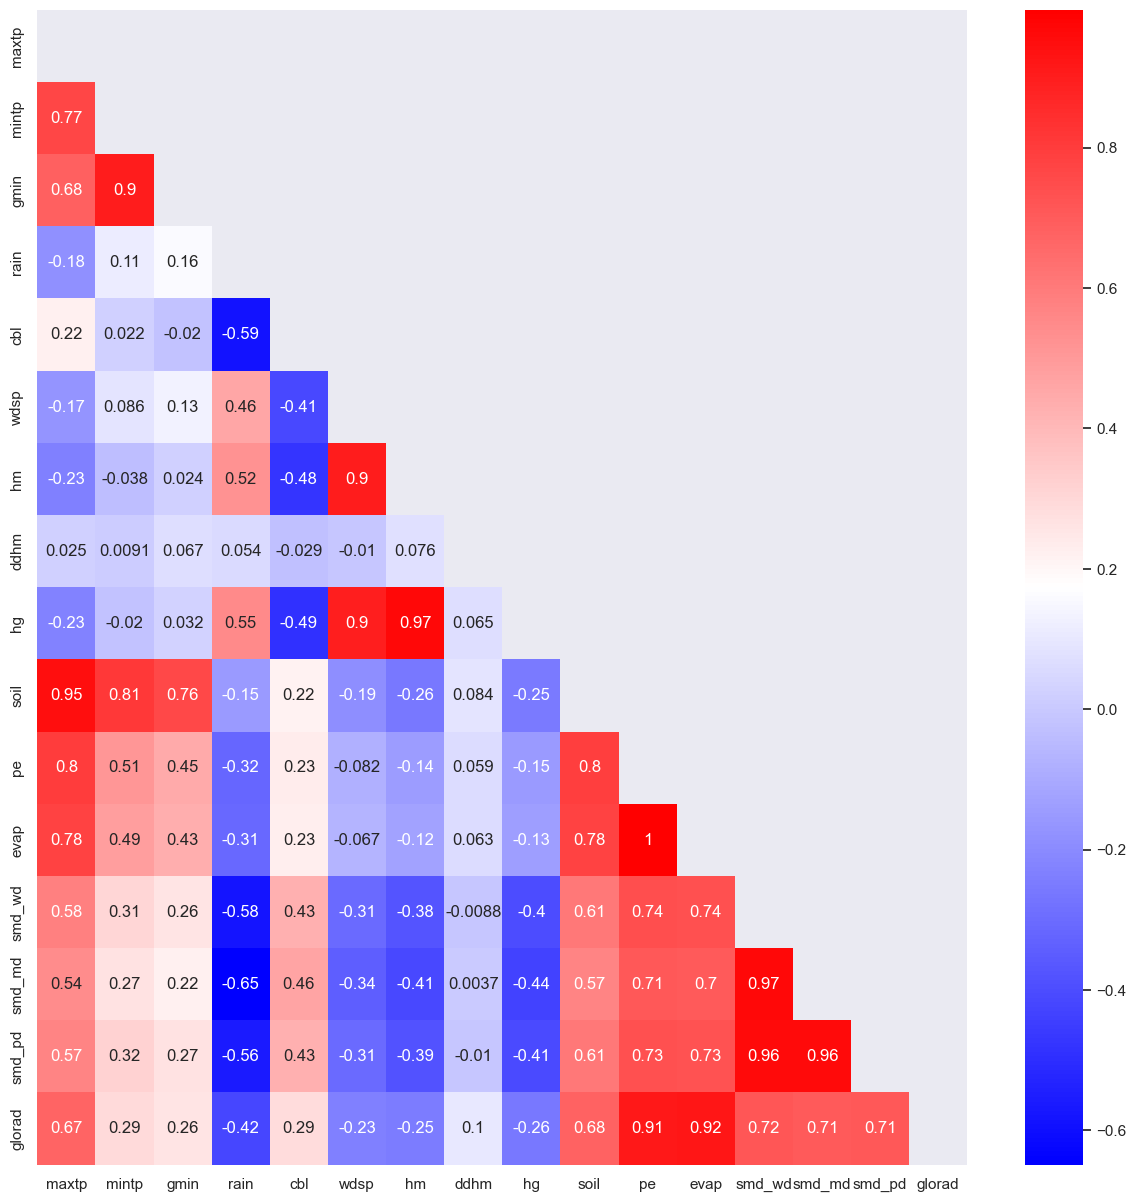

In [63]:
num_cols = county_galway.select_dtypes(include="number").filter(regex='^(?!ind)').columns     
corr = county_galway[num_cols].corr(method="spearman")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap="bwr")
plt.savefig("galway_heatmap_spearman.png")

In [67]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_galway.drop(['rainfall_class','date'], axis=1)
y = county_galway['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("K Nearest Neighbors", KNeighborsClassifier(neighbors=5))"),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.910,0.853,0.930,0.777,0.853
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,Support vector machine,0.893,0.823,0.911,0.734,0.823
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


In [68]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_galway.drop(['rainfall_class','date','hm'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("Support vector machine", SVC()),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)


,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.918,0.866,0.923,0.809,0.866
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,Support vector machine,0.893,0.823,0.911,0.734,0.823
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Removing Minimum Temperature

In [10]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_galway.drop(['rainfall_class','date', 'mintp'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("Support vector machine", SVC()),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.909,0.850,0.923,0.777,0.850
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,Support vector machine,0.896,0.828,0.911,0.745,0.828
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Removing soil

In [11]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_galway.drop(['date','rainfall_class', 'soil'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("Support vector machine", SVC()),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.909,0.851,0.926,0.777,0.851
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,Support vector machine,0.890,0.817,0.911,0.723,0.817
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping pe

In [50]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_galway.drop(['date','rainfall_class', 'pe'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("Support vector machine", SVC()),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.960,0.945,1.000,0.89,0.945
1,Random forest,0.978,0.969,0.989,0.95,0.969
2,Support vector machine,0.964,0.950,1.000,0.90,0.950
3,Adaptive boosting,0.957,0.939,0.989,0.89,0.939
4,Extreme gradient boosting,0.978,0.969,0.989,0.95,0.969


Dropping hg

In [13]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_galway.drop(['date','rainfall_class', 'hg'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("Support vector machine", SVC()),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.921,0.871,0.923,0.819,0.871
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,Support vector machine,0.896,0.826,0.908,0.745,0.826
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping Smd_wd

In [14]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_galway.drop(['date','rainfall_class','smd_wd'], axis=1)
y =  county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("Support vector machine", SVC()),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.914,0.859,0.930,0.787,0.859
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,Support vector machine,0.895,0.824,0.904,0.745,0.824
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping Smd_md 

In [15]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score
 
X = county_galway.drop(['date','rainfall_class','smd_md'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("Support vector machine", SVC()),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.914,0.859,0.930,0.787,0.859
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,Support vector machine,0.893,0.823,0.911,0.734,0.823
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping all previously mentioned columns

In [17]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_galway.drop(['date','rainfall_class','hg','hm','pe','soil','mintp','smd_wd','smd_md'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("Support vector machine", SVC()),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.932,0.889,0.926,0.851,0.889
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,Support vector machine,0.909,0.849,0.911,0.787,0.849
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


In [ ]:
#pip install lofo-importance

In [18]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from lofo import LOFOImportance, Dataset, plot_importance
%matplotlib inline

C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lofo\lofo_importance.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [42]:
# extract a sample of the data
sample_galway =county_galway.drop(['date','rain'], axis=1)
#sample_df.sort_values("columnid", inplace=True) # Sort by time for time split validation

In [43]:
# define the validation scheme
cv4 = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

In [44]:
# define the binary target and the features
dataset4 = Dataset(df=sample_galway, target="rainfall_class", features=[col for col in sample_galway.columns if col != "rainfall_class"])

In [45]:
from sklearn.linear_model import LogisticRegression
# change the default model to logistic regression
log_reg = LogisticRegression()
lofo_imploggalway = LOFOImportance(dataset4, cv=cv4, scoring="roc_auc", model=log_reg)

In [46]:
# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imploggalway.get_importance()

100%|██████████| 16/16 [00:03<00:00,  4.32it/s]


In [47]:
print(importance_df)

   feature  importance_mean  importance_std  val_imp_0  val_imp_1  val_imp_2  \
7   smd_md         0.016212        0.016603   0.038898  -0.007823   0.014724   
3       hg         0.009011        0.004106   0.014798   0.008100   0.009833   
9     evap         0.007164        0.007427   0.016516  -0.001569   0.012178   
6    igmin         0.006834        0.005672   0.015804   0.000831   0.003378   
10    gmin         0.006674        0.005701   0.015559  -0.000346   0.005874   
0       hm         0.006439        0.006013   0.014430  -0.002515   0.006656   
5      cbl         0.005075        0.008949   0.010258  -0.003508   0.017119   
13  smd_wd         0.004585        0.008438   0.018259  -0.004684   0.001336   
1     wdsp         0.004444        0.004680   0.006233  -0.003600   0.007841   
2    maxtp         0.004097        0.009162   0.015166   0.002261   0.008623   
15   mintp         0.003510        0.008199   0.017596   0.000508  -0.002118   
11    soil         0.002040        0.005

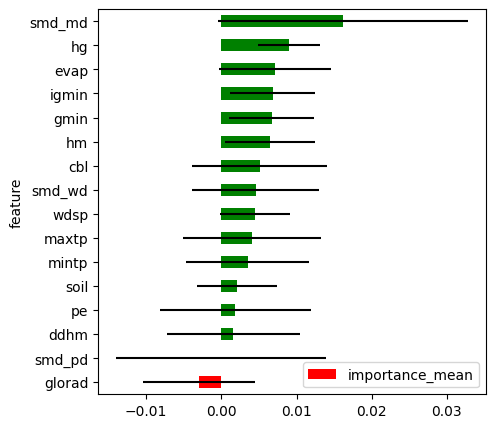

In [48]:
# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(5, 5))

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_cls =  RandomForestClassifier()
lofo_imprandomforest = LOFOImportance(dataset4, cv=cv4, scoring="roc_auc", model=rf_cls)

In [50]:
importance_dfforest = lofo_imprandomforest.get_importance()

100%|██████████| 16/16 [00:32<00:00,  2.04s/it]


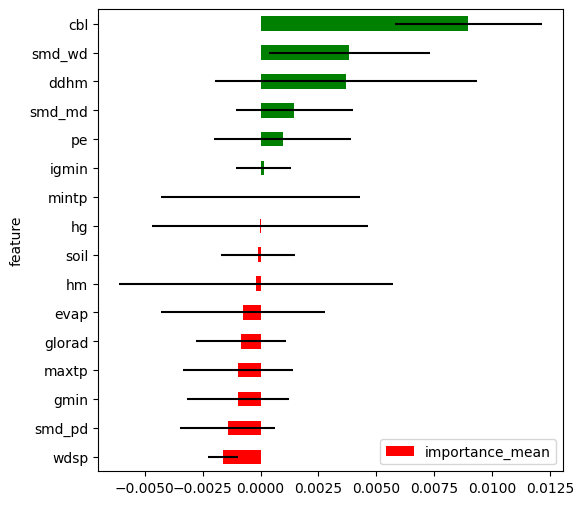

In [52]:
plot_importance(importance_dfforest, figsize=(6, 6))

In [53]:
from sklearn.svm import SVC
rf_sv =  SVC()
lofo_impsupportvm = LOFOImportance(dataset4, cv=cv4, scoring="roc_auc", model=rf_sv)

In [54]:
importance_svc = lofo_impsupportvm.get_importance()

100%|██████████| 16/16 [00:14<00:00,  1.12it/s]


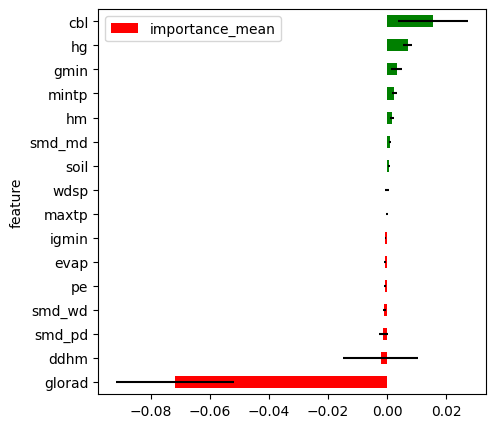

In [55]:
plot_importance(importance_svc, figsize=(5, 5))

In [56]:
from sklearn.ensemble import AdaBoostClassifier
rf_adaboooster =  AdaBoostClassifier()
lofo_impadabooster = LOFOImportance(dataset4, cv=cv4, scoring="roc_auc", model=rf_adaboooster)

In [57]:
importance_ada = lofo_impadabooster.get_importance()

100%|██████████| 16/16 [00:30<00:00,  1.88s/it]


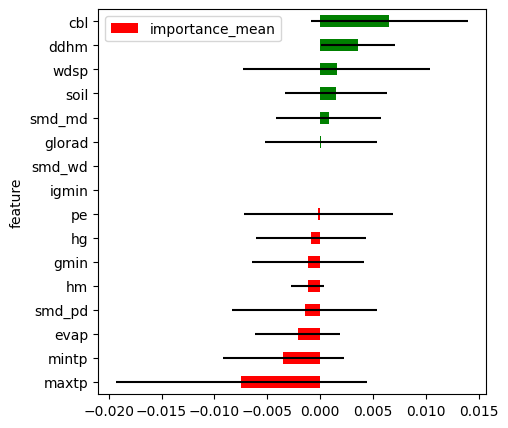

In [58]:
plot_importance(importance_ada, figsize=(5, 5))

In [59]:
from xgboost import XGBClassifier
rf_xgbbooster =  XGBClassifier()
lofo_impxgbbooster = LOFOImportance(dataset4, cv=cv4, scoring="roc_auc", model=rf_xgbbooster)

In [60]:
importance_xgb = lofo_impxgbbooster.get_importance()

100%|██████████| 16/16 [00:11<00:00,  1.41it/s]


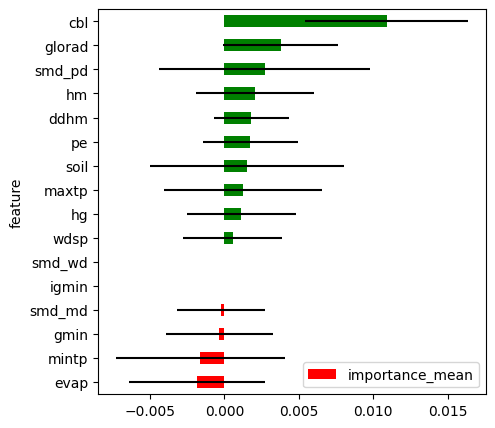

In [61]:
plot_importance(importance_xgb, figsize=(5, 5))

In [65]:
import shap
shap.initjs() 

Permutation explainer: 1825it [01:01, 24.45it/s]                          


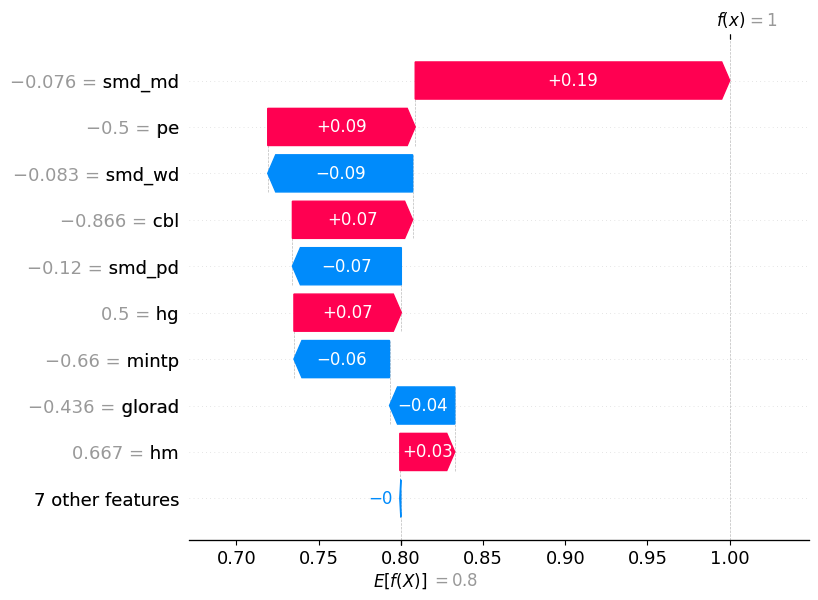

In [72]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_galway.drop(['date','rain','rainfall_class'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from shap import KernelExplainer
logreg = LogisticRegression().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainerlogreg = shap.Explainer(logreg.predict, X)
shap_valueslogreg = explainerlogreg(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_valueslogreg[0])
#shap.plots.force(shap_values[0])

Permutation explainer: 1825it [28:58,  1.05it/s]                          


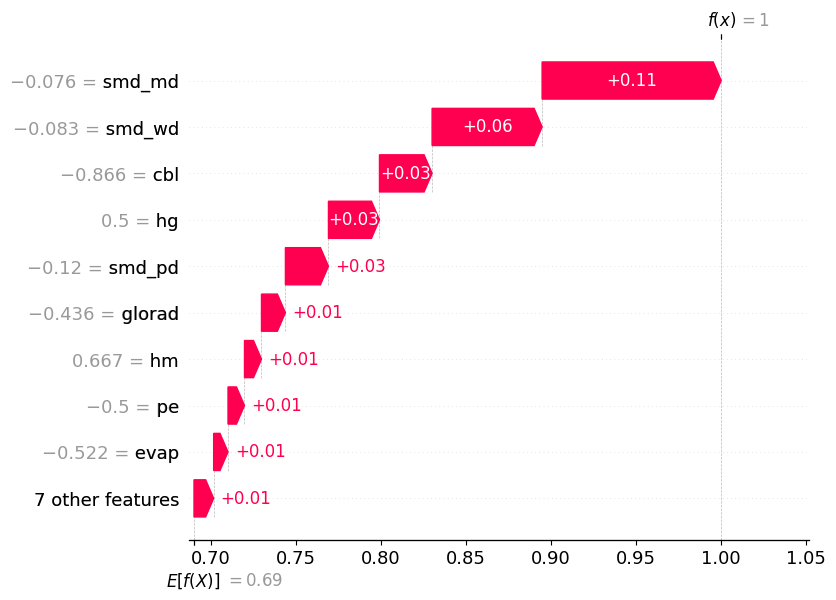

In [4]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# Split data into features and target
X = county_galway.drop(['date','rain','rainfall_class'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rand_forest = RandomForestClassifier().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_forest = shap.Explainer(rand_forest.predict, X)
shap_values_forest = explainer_forest(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values_forest[0])

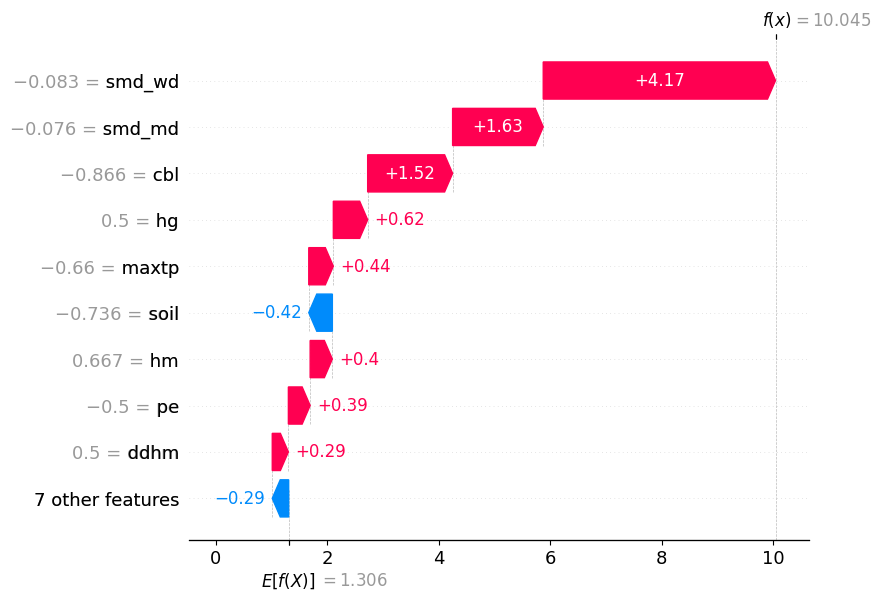

In [5]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_galway.drop(['date','rain','rainfall_class'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelxgb = XGBClassifier().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainerxgb = shap.Explainer(modelxgb)
shap_xgb = explainerxgb(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_xgb[0])

Permutation explainer: 1825it [21:51,  1.38it/s]                           


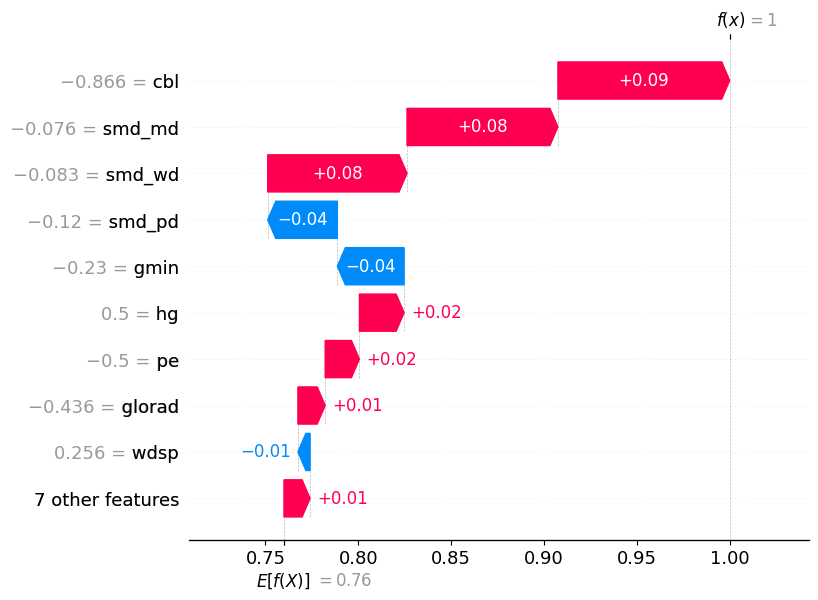

In [6]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_galway.drop(['date','rain','rainfall_class'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


adboost = AdaBoostClassifier().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_adaboost = shap.Explainer(adboost.predict, X)
shap_adaboost = explainer_adaboost(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_adaboost[0])

Permutation explainer: 1825it [11:21:09, 22.42s/it]                                


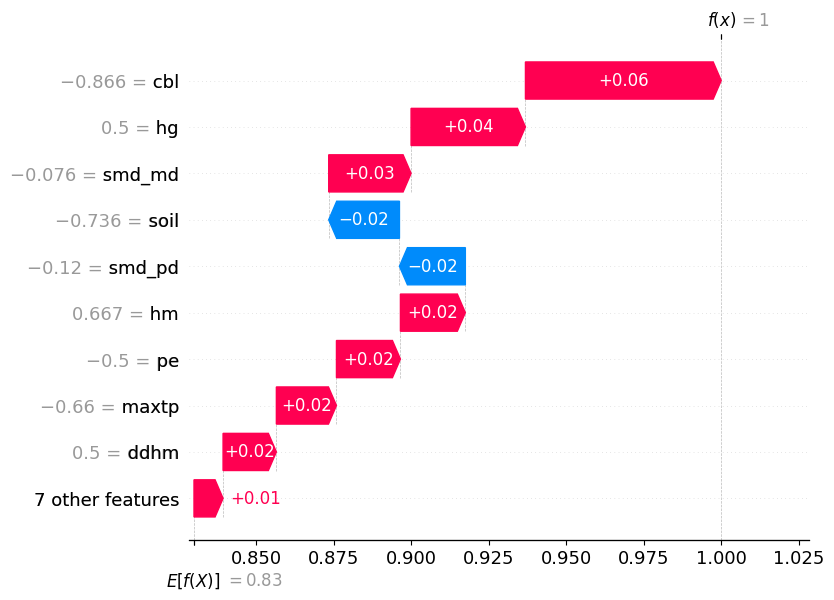

In [7]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_galway.drop(['date','rain','rainfall_class'], axis=1)
y = county_galway['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

supportvect = SVC().fit(X, y)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_supportvmachine = shap.Explainer(supportvect.predict, X)
shap_values_supportvmachine = explainer_supportvmachine(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values_supportvmachine[0])
